## Reference
Ising formulations of many NP problems  
Andrew Lucas  
https://arxiv.org/abs/1302.5843

# Maxcut
The maxcut problem is to see if you can cross as many edges as possible in a single stroke.

## Ising Hamiltonian
The hamiltonian of maxcut is

$$H = -\sum_{i,j}\frac{1}{2}(1-z_iz_j)$$

z takes a value of 1 or -1, corresponding to the value of each vertex.

## Example
Let's solve a graph problem with five points and six edges. First, let's draw the graph.

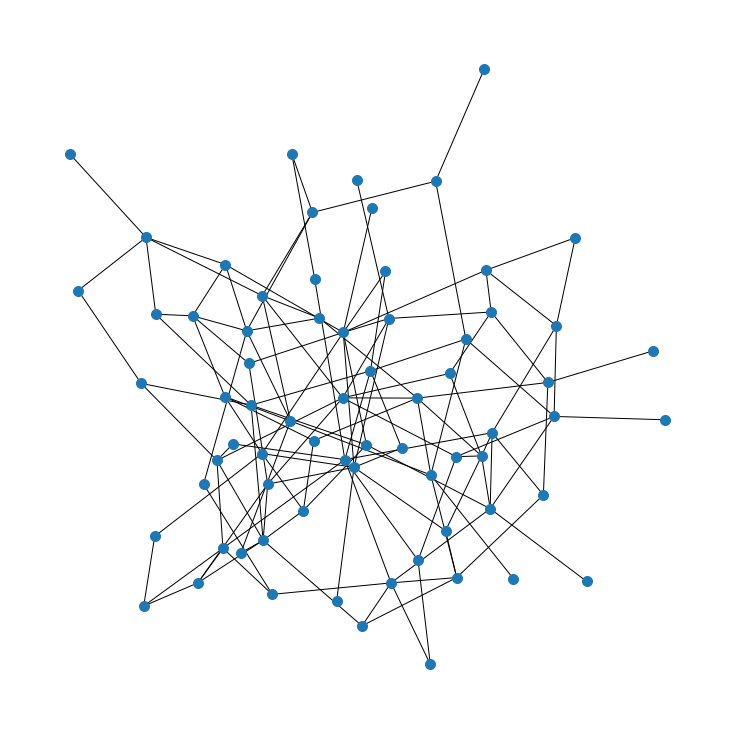

In [204]:
import networkx as nx
import matplotlib.pyplot as plt

n = 70
m = 130
seed = 14

plt.figure(figsize=(10,10))
options = {'node_size': 100}

G = nx.gnm_random_graph(n, m, seed = seed)
nx.draw(G, **options)

## Solving with a simulator
Here, we will use the variational solver function of blueqat to solve the problem on a simulator.

hamiltonian:1.0*Z[0]*Z[3] + 1.0*Z[0]*Z[25] + 1.0*Z[0]*Z[8] + 1.0*Z[0]*Z[19] + 1.0*Z[0]*Z[65] + 1.0*Z[0]*Z[30] + 1.0*Z[1]*Z[8] + 1.0*Z[2]*Z[56] + 1.0*Z[2]*Z[44] + 1.0*Z[2]*Z[18] + 1.0*Z[2]*Z[37] + 1.0*Z[3]*Z[10] + 1.0*Z[3]*Z[20] + 1.0*Z[3]*Z[42] + 1.0*Z[3]*Z[56] + 1.0*Z[3]*Z[48] + 1.0*Z[3]*Z[24] + 1.0*Z[4]*Z[12] + 1.0*Z[4]*Z[18] + 1.0*Z[4]*Z[20] + 1.0*Z[4]*Z[31] + 1.0*Z[5]*Z[24] + 1.0*Z[5]*Z[52] + 1.0*Z[5]*Z[39] + 1.0*Z[6]*Z[18] + 1.0*Z[6]*Z[48] + 1.0*Z[6]*Z[21] + 1.0*Z[6]*Z[58] + 1.0*Z[7]*Z[69] + 1.0*Z[8]*Z[18] + 1.0*Z[8]*Z[12] + 1.0*Z[8]*Z[56] + 1.0*Z[8]*Z[9] + 1.0*Z[9]*Z[57] + 1.0*Z[9]*Z[46] + 1.0*Z[9]*Z[32] + 1.0*Z[10]*Z[34] + 1.0*Z[11]*Z[35] + 1.0*Z[11]*Z[67] + 1.0*Z[11]*Z[43] + 1.0*Z[11]*Z[28] + 1.0*Z[11]*Z[31] + 1.0*Z[12]*Z[56] + 1.0*Z[12]*Z[23] + 1.0*Z[12]*Z[53] + 1.0*Z[12]*Z[49] + 1.0*Z[13]*Z[67] + 1.0*Z[13]*Z[15] + 1.0*Z[13]*Z[33] + 1.0*Z[13]*Z[32] + 1.0*Z[14]*Z[46] + 1.0*Z[14]*Z[52] + 1.0*Z[14]*Z[32] + 1.0*Z[14]*Z[54] + 1.0*Z[14]*Z[45] + 1.0*Z[15]*Z[33] + 1.0*Z[15]*Z[43] + 1.

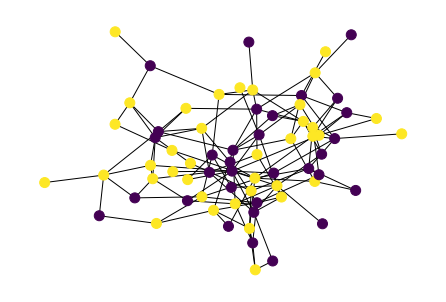

In [206]:
from blueqat import vqe
from blueqat.pauli import Z
from blueqat.utils import qaoa
import numpy as np

hamiltonian = sum(Z[e[0]]*Z[e[1]] for e in G.edges)
step = 1

result = qaoa(hamiltonian, step)
b = result.circuit.run(shots=10)
sample = b.most_common(1)[0][0]

print("hamiltonian:" + str(hamiltonian))
print("sample:"+ str(sample))

nx.draw(G, **options, node_color=[int(s) for s in list(sample)])

The edges between the vertices of different colors will be cut.